# Neural Network for MNIST database recognizing - **Tensorflow**

This is a Neural Network developed with `Tensorflow`, only for learning purposes. The objective of this project is practice Neural Networks Design principles and enhance knowledges on Machine Learning and Deep Learning.


## 1 - Library Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import MeanSquaredError, SparseCategoricalCrossentropy, BinaryCrossentropy

import matplotlib.pyplot as plt
import os
import mnist

## 2 - MNIST Datasets download

In [2]:
if(not os.path.isdir("./datasets/")):
    os.mkdir("./datasets")
if(not os.path.isfile("./datasets/train-images-idx3-ubyte.gz")):
    mnist.download_file("train-images-idx3-ubyte.gz", "./datasets")
if(not os.path.isfile("./datasets/train-labels-idx1-ubyte.gz")):
    mnist.download_file("train-labels-idx1-ubyte.gz", "./datasets")
if(not os.path.isfile("./datasets/t10k-images-idx3-ubyte.gz")):
    mnist.download_file("t10k-images-idx3-ubyte.gz", "./datasets")
if(not os.path.isfile("./datasets/t10k-labels-idx1-ubyte.gz")):
    mnist.download_file("t10k-labels-idx1-ubyte.gz", "./datasets")

## 3 - MNIST Datasets Load

In [3]:
train_images_raw = mnist.train_images()
train_labels = mnist.train_labels()
test_images_raw = mnist.test_images()
test_labels = mnist.test_labels()

train_images = train_images_raw.reshape(train_images_raw.shape[0], train_images_raw.shape[1]*train_images_raw.shape[2])

test_images = test_images_raw.reshape(test_images_raw.shape[0], test_images_raw.shape[1]*test_images_raw.shape[2])

## 4 - Neural Network Model and Training

In [4]:
LAYER_UNITS = np.array([32, 16, 10], dtype=np.uint32)
LAYER_ACTIVATIONS = np.array(['relu', 'relu', 'linear'])
EPOCHS = 40
MINIBATCH_SIZE = 256

layers = [Dense(units = LAYER_UNITS[j], activation=LAYER_ACTIVATIONS[j]) for j in range(LAYER_UNITS.shape[0])]
layers.insert(0, tf.keras.Input(shape=(784, )))
model = Sequential(layers)
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(from_logits=True))

model.fit(train_images, train_labels, batch_size=MINIBATCH_SIZE, epochs=EPOCHS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
235/235 [==============================] - 1s 3ms/step - loss: 4.0249
Epoch 2/40
235/235 [==============================] - 1s 3ms/step - loss: 1.5656
Epoch 3/40
235/235 [==============================] - 1s 2ms/step - loss: 1.1528
Epoch 4/40
235/235 [==============================] - 1s 3ms/step - loss: 0.9399
Epoch 5/40
235/235 [==============================] - 1s 3

## 5 - Measuring accuracy on test set

In [5]:
test_softmax = model.predict(test_images)
test_outputs = np.array([np.argmax(outp) for outp in test_softmax])
test_comparison = np.array([np.array_equal((test_outputs[i]), test_labels[i]) for i in range(test_outputs.shape[0])])
test_accuracy = np.sum(test_comparison)*100/test_comparison.shape[0]
print(f"Accuracy on test set prediction: {test_accuracy} %")

Accuracy on test set prediction: 95.32 %


## 6 - Measuring accuracy on train set

In [6]:
train_softmax = model.predict(train_images)
train_outputs = np.array([np.argmax(outp) for outp in train_softmax])
train_comparison = np.array([np.array_equal(np.argmax(train_outputs[i]), np.argmax(train_labels[i])) for i in range(train_outputs.shape[0])])
train_accuracy = np.sum(train_comparison)*100/train_comparison.shape[0]
print(f"Accuracy on train set prediction: {train_accuracy} %")

Accuracy on train set prediction: 100.0 %


## 7 - Test playground

Saída esperada: 7
Saída predita: 7


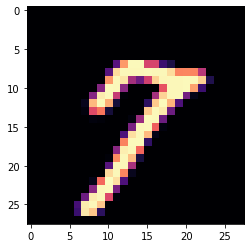

In [13]:
index = int(np.round(np.random.rand()*len(test_images)))

plt.imshow(test_images_raw[index], cmap='magma')
print(f"Saída esperada: {test_labels[index]}")
test_predict = model.predict(test_images[index].reshape(1, 784))
print(f"Saída predita: {np.argmax(test_predict)}")